In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, utils
from torch.utils.data import DataLoader



In [54]:
DATA = pd.read_csv('neo_db_prev.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_27720\1855742764.py:1: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  DATA = pd.read_csv('neo_db_prev.csv')


In [55]:
## remove 2 first columns
DATA = DATA.iloc[:,2:]

In [56]:
DATA

,kind,class,H,G,BV,UB,IR,spec_T,spec_B,equinox,...,albedo,diameter,extent,diameter_sigma,GM,density,rot_per,A1,A2,A3
0,an,AMO,10.41,0.46,0.921,0.531,NaN,S,S,J2000,...,0.250,16.840,34.4x11.2x11.2,0.06,0.000446,2.67,5.270,NaN,NaN,NaN
1,an,AMO,15.59,NaN,NaN,NaN,NaN,NaN,S,J2000,...,NaN,NaN,NaN,NaN,NaN,NaN,5.801,NaN,NaN,NaN
2,an,AMO,13.80,-0.12,0.832,0.436,NaN,S,NaN,J2000,...,0.310,4.200,NaN,NaN,NaN,NaN,28.410,NaN,NaN,NaN
3,an,AMO,9.18,0.30,0.842,0.417,NaN,S,S,J2000,...,0.238,37.675,NaN,0.40,NaN,NaN,10.297,NaN,NaN,NaN
4,an,AMO,17.37,NaN,NaN,NaN,NaN,NaN,NaN,J2000,...,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,-7.200000e-15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38100,cu,JFc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38101,cu,HTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.400000e-09,-3.000000e-10,2.100000e-09
38102,cu,HTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38103,cu,ETc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
DATA.columns

Index(['kind', 'class', 'H', 'G', 'BV', 'UB', 'IR', 'spec_T', 'spec_B',
       'equinox', 'epoch', 'e', 'a', 'q', 'i', 'om', 'w', 'tp', 'ma', 'albedo',
       'diameter', 'extent', 'diameter_sigma', 'GM', 'density', 'rot_per',
       'A1', 'A2', 'A3'],
      dtype='object')

Quitar 
 
G BV  UB IR spec_T equinox extent GM density tp ma diameter_sigma epoch

In [58]:
DATA["epoch"].describe()

count    3.810500e+04
mean     2.460008e+06
std      1.986196e+03
min      2.366200e+06
25%      2.460232e+06
50%      2.460800e+06
75%      2.460800e+06
max      2.460800e+06
Name: epoch, dtype: float64

In [ ]:
cols_to_remove = ['G', 'BV', 'UB', 'IR', 'spec_T','spec_B', 'equinox', 'extent', 'GM', 'density', 'tp', 'ma', 'diameter_sigma', 'epoch', "A1", "A2", "A3", 'kind', "w", "rot_per"]
DATA = DATA.drop(columns=cols_to_remove)


In [60]:
list(DATA.columns)

## print columnds type
for col in DATA.columns:
    print(col, DATA[col].dtype)

kind object
class object
H float64
e float64
a float64
q float64
i float64
albedo float64
diameter float64


In [62]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

########################################################################
# PARTE 1: Preprocesamiento de datos (cambiando a RobustScaler)
########################################################################

# Supongamos que DATA es tu DataFrame original con columnas continuas:
# ['H', 'e', 'a', 'q', 'i', 'om', 'w', 'albedo', 'diameter', 'rot_per'] 
# y algunas columnas categóricas ['kind', 'class'] que NO usaremos.

# 1. Dividir en train/test basado en la disponibilidad de 'albedo'
indices_con_albedo = DATA.index[DATA['albedo'].notna()].tolist()
indices_sin_albedo = DATA.index[DATA['albedo'].isna()].tolist()

train_idx_con, test_idx_con = train_test_split(indices_con_albedo, test_size=0.2)
train_idx_sin, test_idx_sin = train_test_split(indices_sin_albedo, test_size=0.2)

train_indices = train_idx_con + train_idx_sin
test_indices  = test_idx_con  + test_idx_sin

train_df = DATA.loc[train_indices].copy()
test_df  = DATA.loc[test_indices].copy()

print("Total de filas en DATA:", len(DATA))
print("Filas en TRAIN:", len(train_df))
print("Filas en TEST:", len(test_df))
print("En TEST, % de filas con albedo conocido:", test_df['albedo'].notna().mean()*100)

# 2. Seleccionar las columnas continuas (sin 'kind' ni 'class')
continuous_cols = ['H', 'e', 'a', 'q', 'i', 'albedo',
                   'diameter']

train_cont_df = train_df[continuous_cols].copy()
test_cont_df  = test_df[continuous_cols].copy()

# 3. Crear máscaras (1 donde hay dato, 0 donde falta) e imputar nulos con la media
train_mask_cont = train_cont_df.notna().astype(float).values
test_mask_cont  = test_cont_df.notna().astype(float).values

train_cont_filled = train_cont_df.fillna(train_cont_df.mean())
test_cont_filled  = test_cont_df.fillna(train_cont_df.mean())

# 4. Aplicar RobustScaler
scaler = RobustScaler()
train_cont_scaled = scaler.fit_transform(train_cont_filled)
test_cont_scaled  = scaler.transform(test_cont_filled)

# 5. Convertir a tensores de PyTorch
train_cont_scaled = train_cont_scaled.astype(np.float32)
test_cont_scaled  = test_cont_scaled.astype(np.float32)
train_mask_cont   = train_mask_cont.astype(np.float32)
test_mask_cont    = test_mask_cont.astype(np.float32)

train_tensor = torch.tensor(train_cont_scaled, dtype=torch.float32)
test_tensor  = torch.tensor(test_cont_scaled, dtype=torch.float32)
train_mask_tensor = torch.tensor(train_mask_cont, dtype=torch.float32)
test_mask_tensor  = torch.tensor(test_mask_cont, dtype=torch.float32)

print("Dimensión de train_tensor:", train_tensor.shape)
print("Dimensión de test_tensor:", test_tensor.shape)


Total de filas en DATA: 38105
Filas en TRAIN: 30483
Filas en TEST: 7622
En TEST, % de filas con albedo conocido: 3.1750196798740484
Dimensión de train_tensor: torch.Size([30483, 7])
Dimensión de test_tensor: torch.Size([7622, 7])


c:\Users\User\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Época 1/200, Beta: 0.0000, Train Loss: 7.870810, Val Loss: 0.434881
Época 2/200, Beta: 0.0025, Train Loss: 6.892935, Val Loss: 0.423638
Época 3/200, Beta: 0.0050, Train Loss: 6.751061, Val Loss: 0.396478
Época 4/200, Beta: 0.0075, Train Loss: 6.625783, Val Loss: 0.359918
Época 5/200, Beta: 0.0100, Train Loss: 6.509172, Val Loss: 0.275900
Época 6/200, Beta: 0.0125, Train Loss: 6.435686, Val Loss: 0.678140
Época 7/200, Beta: 0.0150, Train Loss: 6.332646, Val Loss: 0.292023
Época 8/200, Beta: 0.0175, Train Loss: 6.329879, Val Loss: 0.457733
Época 9/200, Beta: 0.0200, Train Loss: 6.260203, Val Loss: 0.549951
Época 10/200, Beta: 0.0225, Train Loss: 6.456557, Val Loss: 1.181599
Época 11/200, Beta: 0.0250, Train Loss: 6.255984, Val Loss: 2.759876
Época 12/200, Beta: 0.0275, Train Loss: 6.119049, Val Loss: 0.459997
Época 13/200, Beta: 0.0300, Train Loss: 6.109119, Val Loss: 0.478626
Época 14/200, Beta: 0.0325, Train Loss: 6.089275, Val Loss: 0.572714
Época 15/200, Beta: 0.0350, Train Loss: 6.0

C:\Users\User\AppData\Local\Temp\ipykernel_27720\3478709697.py:187: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('vae_model_best.pth'))


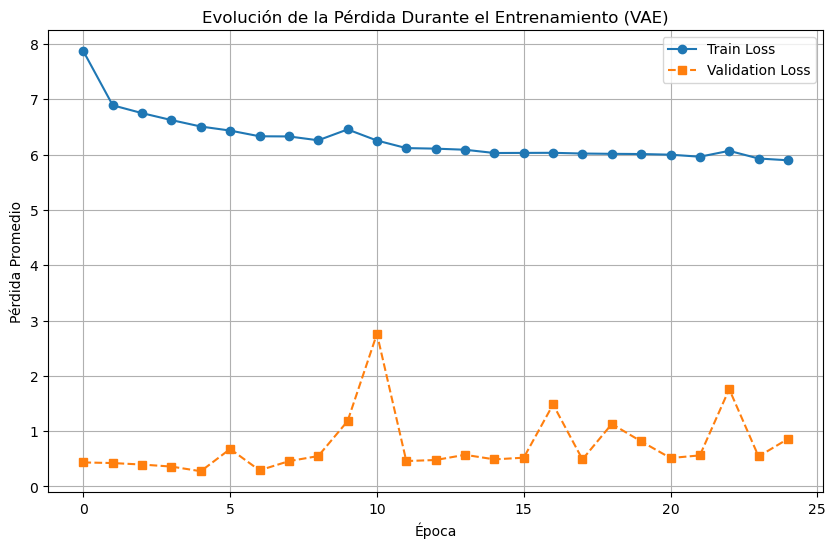

Pérdida final en conjunto de prueba: 0.685200


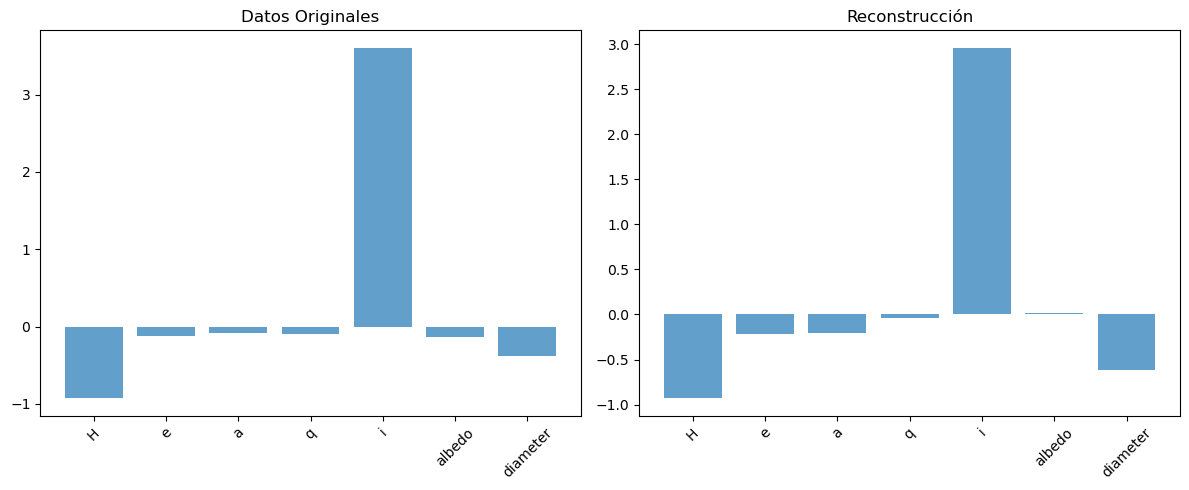

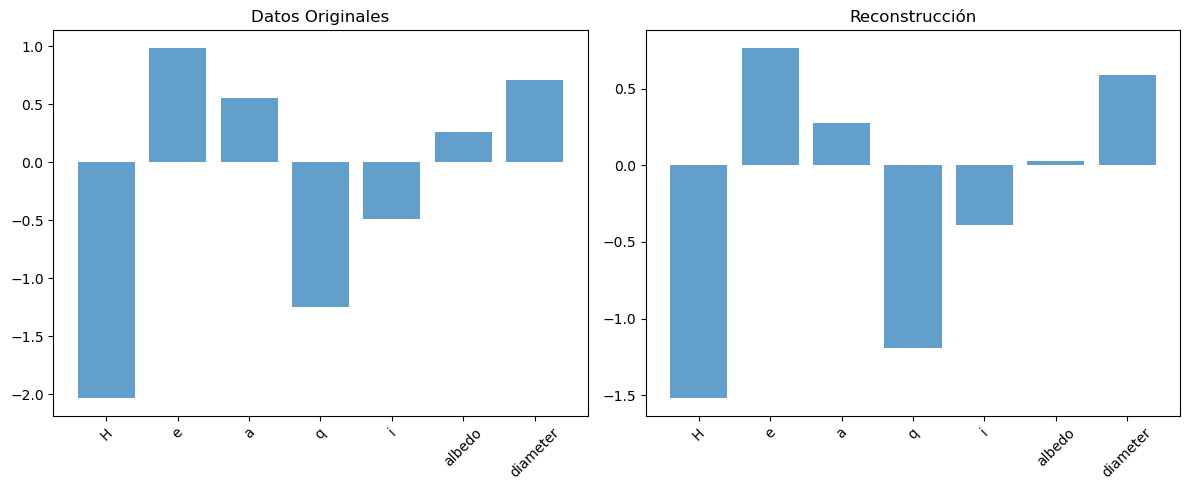

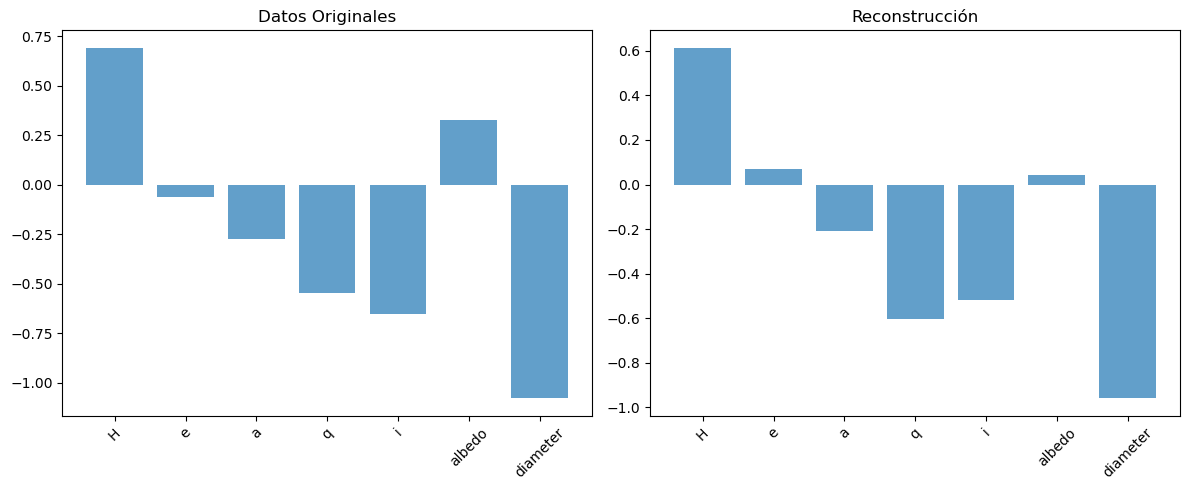

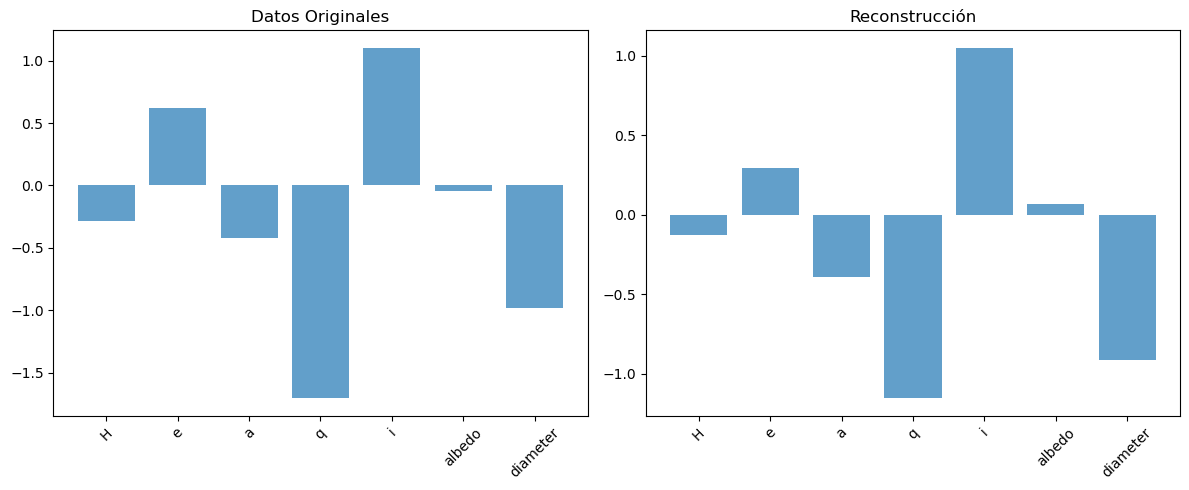

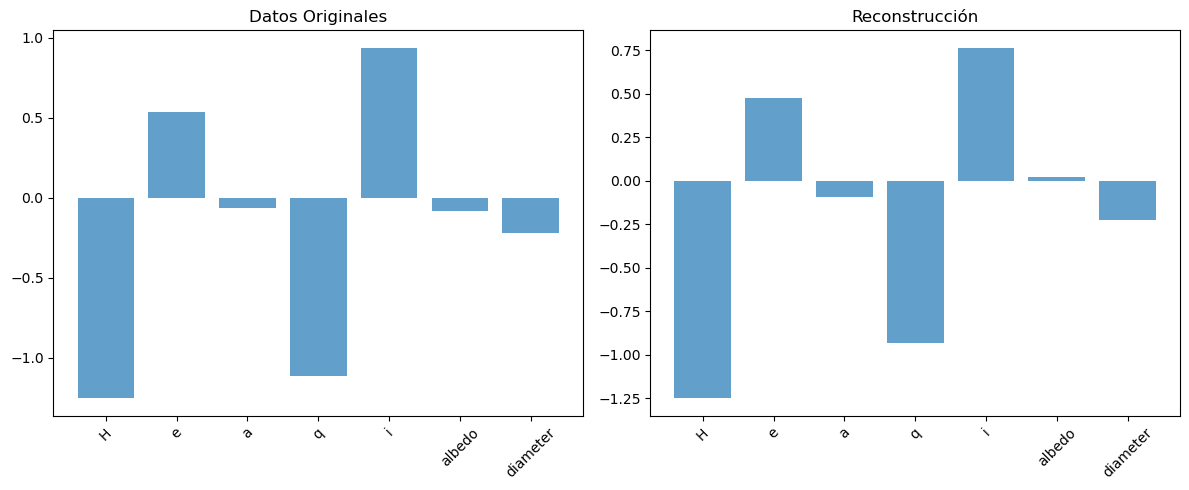

In [69]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

# Supongamos que ya tienes definidos:
#   - train_tensor, train_mask_tensor, test_tensor, test_mask_tensor
#   - continuous_cols: lista de nombres de variables continuas

########################################################################
# PARTE 2: Definición del Dataset y DataLoader
########################################################################

class AsteroidDataset(Dataset):
    def __init__(self, data_tensor, mask_tensor):
        self.data = data_tensor
        self.mask = mask_tensor
        
    def __len__(self):
        return self.data.shape[0]
    
    def __getitem__(self, idx):
        return self.data[idx], self.mask[idx]

train_dataset = AsteroidDataset(train_tensor, train_mask_tensor)
test_dataset = AsteroidDataset(test_tensor, test_mask_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

########################################################################
# PARTE 3: Definición de un VAE con capacidad y con la máscara concatenada
########################################################################

class VAE(nn.Module):
    def __init__(self, data_dim, hidden_dim=100, latent_dim=20):
        """
        data_dim: número de variables originales.
        Como se concatenará la máscara, el input real es de dimensión 2*data_dim.
        """
        super(VAE, self).__init__()
        input_dim = data_dim * 2  # Concatenamos datos y máscara
        self.activation = nn.SiLU()
        
        self.dropout_enc = nn.Dropout(0.01)
        self.dropout_dec = nn.Dropout(0.01)
        
        # ----- Encoder -----
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.bn1 = nn.BatchNorm1d(hidden_dim)
        
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.bn2 = nn.BatchNorm1d(hidden_dim)
        
        self.fc3 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.bn3 = nn.BatchNorm1d(hidden_dim // 2)
        
        self.fc_mu = nn.Linear(hidden_dim // 2, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim // 2, latent_dim)
        
        # ----- Decoder -----
        self.fc4 = nn.Linear(latent_dim, hidden_dim // 2)
        self.bn4 = nn.BatchNorm1d(hidden_dim // 2)
        
        self.fc5 = nn.Linear(hidden_dim // 2, hidden_dim)
        self.bn5 = nn.BatchNorm1d(hidden_dim)
        
        self.fc6 = nn.Linear(hidden_dim, hidden_dim)
        self.bn6 = nn.BatchNorm1d(hidden_dim)
        
        self.fc7 = nn.Linear(hidden_dim, data_dim)  # Salida: reconstrucción de los datos originales
        
    def encode(self, x):
        h = self.activation(self.bn1(self.fc1(x)))
        h = self.dropout_enc(h)
        h = self.activation(self.bn2(self.fc2(h)))
        h = self.dropout_enc(h)
        h = self.activation(self.bn3(self.fc3(h)))
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar
    
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def decode(self, z):
        h = self.activation(self.bn4(self.fc4(z)))
        h = self.dropout_dec(h)
        h = self.activation(self.bn5(self.fc5(h)))
        h = self.dropout_dec(h)
        h = self.activation(self.bn6(self.fc6(h)))
        recon = self.fc7(h)
        return recon
    
    def forward(self, x, mask):
        # Concatenar datos y máscara para que el modelo sepa qué entradas son observadas.
        x_cat = torch.cat([x, mask], dim=1)
        mu, logvar = self.encode(x_cat)
        z = self.reparameterize(mu, logvar)
        recon = self.decode(z)
        return recon, mu, logvar

# Instanciamos el modelo
data_dim = train_tensor.shape[1]  # número de variables originales
model = VAE(data_dim=data_dim, hidden_dim=30, latent_dim=20)

########################################################################
# PARTE 4: Función de pérdida, entrenamiento y validación
########################################################################

def loss_function(recon, x, mu, logvar, mask, beta=0.1):
    """
    Calcula la pérdida de reconstrucción (MSE) solo en las posiciones donde la máscara es 1,
    y la divergencia KL para regularizar el espacio latente.
    """
    mse = ((recon - x)**2 * mask).sum()
    kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return mse + beta * kl_loss

optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=100, factor=0.5, verbose=True)

num_epochs = 200
patience = 20
best_val_loss = float('inf')
counter = 0
loss_history = []
val_loss_history = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Warm-up para la KL
warmup_epochs = 20
final_beta = 0.05

for epoch in range(num_epochs):
    beta = final_beta * min(1, epoch / warmup_epochs)
    
    model.train()
    epoch_loss = 0
    for batch_data, batch_mask in train_loader:
        batch_data = batch_data.to(device)
        batch_mask = batch_mask.to(device)
        
        optimizer.zero_grad()
        recon, mu, logvar = model(batch_data, batch_mask)
        loss = loss_function(recon, batch_data, mu, logvar, batch_mask, beta=beta)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
        optimizer.step()
        epoch_loss += loss.item()
    
    avg_loss = epoch_loss / len(train_dataset)
    loss_history.append(avg_loss)
    
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch_data, batch_mask in test_loader:
            batch_data = batch_data.to(device)
            batch_mask = batch_mask.to(device)
            recon, mu, logvar = model(batch_data, batch_mask)
            loss = loss_function(recon, batch_data, mu, logvar, batch_mask, beta=beta)
            val_loss += loss.item()
    avg_val_loss = val_loss / len(test_dataset)
    val_loss_history.append(avg_val_loss)
    
    scheduler.step(avg_val_loss)
    print(f"Época {epoch+1}/{num_epochs}, Beta: {beta:.4f}, Train Loss: {avg_loss:.6f}, Val Loss: {avg_val_loss:.6f}")
    
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        counter = 0
        torch.save(model.state_dict(), 'vae_model_best.pth')
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping triggered after {epoch+1} épocas")
            break

# Cargar el mejor modelo guardado
model.load_state_dict(torch.load('vae_model_best.pth'))

# Graficar la evolución de la pérdida
plt.figure(figsize=(10, 6))
plt.plot(loss_history, marker='o', linestyle='-', label='Train Loss')
plt.plot(val_loss_history, marker='s', linestyle='--', label='Validation Loss')
plt.xlabel("Época")
plt.ylabel("Pérdida Promedio")
plt.title("Evolución de la Pérdida Durante el Entrenamiento (VAE)")
plt.legend()
plt.grid(True)
plt.show()

########################################################################
# PARTE 5: Evaluación final en el conjunto de prueba
########################################################################

model.eval()
test_loss = 0
with torch.no_grad():
    for batch_data, batch_mask in test_loader:
        batch_data = batch_data.to(device)
        batch_mask = batch_mask.to(device)
        recon, mu, logvar = model(batch_data, batch_mask)
        loss = loss_function(recon, batch_data, mu, logvar, batch_mask, beta=final_beta)
        test_loss += loss.item()

avg_test_loss = test_loss / len(test_dataset)
print(f"Pérdida final en conjunto de prueba: {avg_test_loss:.6f}")

########################################################################
# PARTE 6: Visualización de reconstrucciones (opcional)
########################################################################

def visualize_reconstructions(model, data_loader, device, num_examples=5):
    model.eval()
    with torch.no_grad():
        for batch_data, batch_mask in data_loader:
            batch_data = batch_data.to(device)
            batch_mask = batch_mask.to(device)
            recon, _, _ = model(batch_data, batch_mask)
            for i in range(min(num_examples, batch_data.size(0))):
                original = batch_data[i].cpu().numpy()
                reconstructed = recon[i].cpu().numpy()
                
                plt.figure(figsize=(12, 5))
                plt.subplot(1, 2, 1)
                plt.bar(range(len(original)), original, alpha=0.7)
                plt.title("Datos Originales")
                plt.xticks(range(len(original)), continuous_cols, rotation=45)
                
                plt.subplot(1, 2, 2)
                plt.bar(range(len(reconstructed)), reconstructed, alpha=0.7)
                plt.title("Reconstrucción")
                plt.xticks(range(len(reconstructed)), continuous_cols, rotation=45)
                
                plt.tight_layout()
                plt.show()
            break  # Procesa solo el primer batch

visualize_reconstructions(model, test_loader, device)


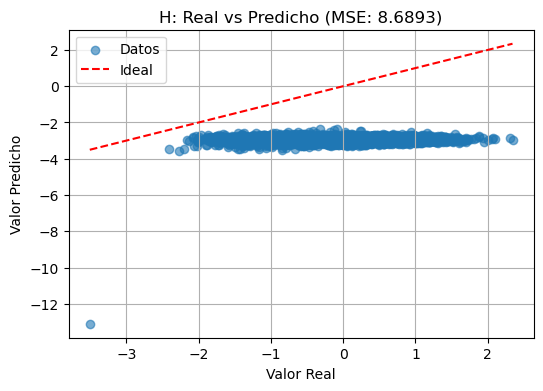

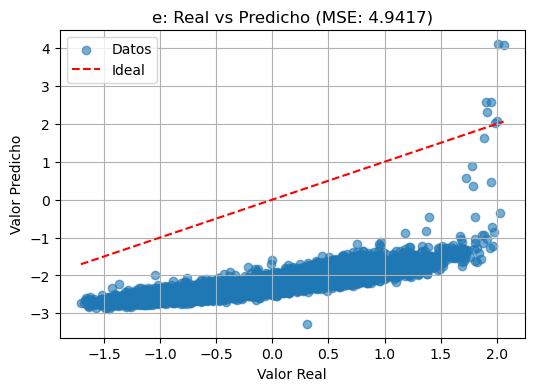

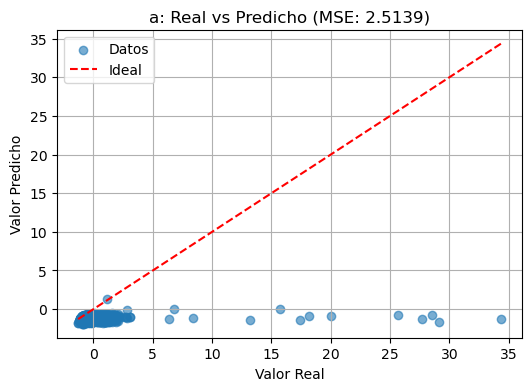

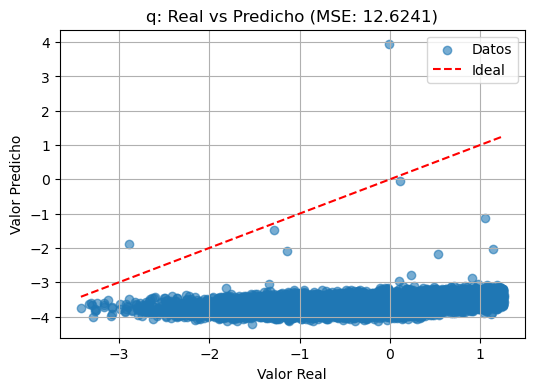

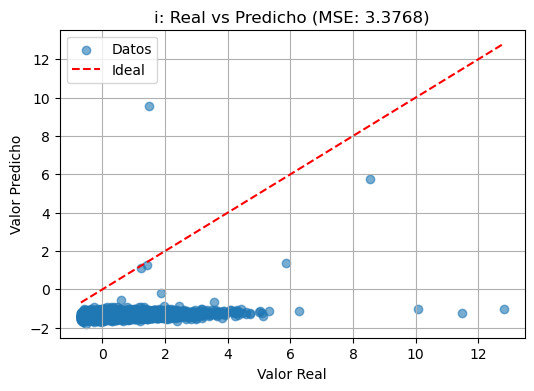

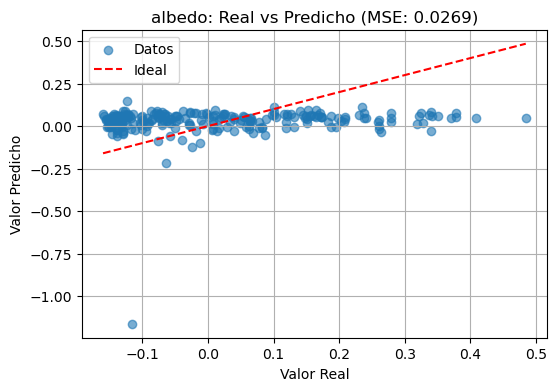

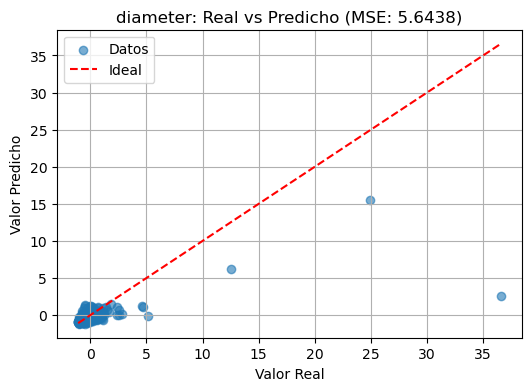

Errores MSE por variable:
H: 8.6893
e: 4.9417
a: 2.5139
q: 12.6241
i: 3.3768
albedo: 0.0269
diameter: 5.6438


In [70]:
import matplotlib.pyplot as plt
import torch

# Asegurarse de que el modelo esté en modo evaluación y en el dispositivo correcto
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Suponiendo que continuous_cols es, por ejemplo:
# ['H', 'e', 'a', 'q', 'i', 'albedo', 'diameter']
n_cont = len(continuous_cols)
mse_per_variable = {}

# Definir un valor marcador para datos faltantes.
# Por ejemplo, tomamos el mínimo del conjunto de entrenamiento y le restamos 1.
missing_value_marker = test_tensor.min().item() - 1.0

# Iterar sobre cada variable continua
for i in range(n_cont):
    var_name = continuous_cols[i]
    
    # Clonar datos y máscara para crear el ejemplo corrupto
    data_corrupted = test_tensor.clone()
    mask_corrupted = test_mask_tensor.clone()
    
    # Seleccionar las filas donde originalmente la variable i estaba presente (observada)
    non_null_indices = (test_mask_tensor[:, i] == 1)
    
    # Simular ausencia: reemplazar los valores reales por el marcador y actualizar la máscara a 0
    data_corrupted[non_null_indices, i] = missing_value_marker
    mask_corrupted[non_null_indices, i] = 0.0  # Indicar que ese valor falta
    
    # Pasar los datos corruptos y la máscara al modelo
    with torch.no_grad():
        # El modelo espera (data, mask)
        recon, mu, logvar = model(data_corrupted.to(device), mask_corrupted.to(device))
    
    # Extraer los valores predichos para la variable i (en CPU)
    pred_values = recon[:, i].cpu()
    
    # Valores reales (ground truth) para la variable i
    true_values = test_tensor[:, i]
    
    # Seleccionar solo las posiciones donde se simuló la ausencia
    true_masked = true_values[non_null_indices]
    pred_masked = pred_values[non_null_indices]
    
    # Calcular el MSE para la variable i (si hay datos enmascarados)
    if true_masked.numel() > 0:
        mse = torch.mean((true_masked - pred_masked) ** 2).item()
    else:
        mse = float('nan')
    
    mse_per_variable[var_name] = mse
    
    # Graficar: scatter plot de valor real vs. valor predicho para la variable
    plt.figure(figsize=(6, 4))
    plt.scatter(true_masked.numpy(), pred_masked.numpy(), alpha=0.6, label='Datos')
    # Dibujar la línea diagonal ideal (y = x)
    plt.plot([true_masked.min().item(), true_masked.max().item()],
             [true_masked.min().item(), true_masked.max().item()],
             'r--', label='Ideal')
    plt.xlabel("Valor Real")
    plt.ylabel("Valor Predicho")
    plt.title(f"{var_name}: Real vs Predicho (MSE: {mse:.4f})")
    plt.legend()
    plt.grid(True)
    plt.show()

# Mostrar los errores MSE por variable
print("Errores MSE por variable:")
for var, error in mse_per_variable.items():
    print(f"{var}: {error:.4f}")


In [77]:
## input dimension

print(data_tensor.shape)

torch.Size([38105, 27])


In [ ]:
import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader

# Supongamos que DATA es tu DataFrame original con todas las variables.
# Variables a trabajar:
# Categóricas: 'kind', 'class', 'spec_B'
# Continuas: 'H', 'e', 'a', 'q', 'i', 'om', 'w', 'albedo', 'diameter', 'rot_per', 'A1', 'A2', 'A3'
categorical_cols = ['kind', 'class']
continuous_cols = ['H', 'e', 'a', 'q', 'i', 'om', 'w', 'albedo', 'diameter', 'rot_per', 'A1', 'A2', 'A3']

# 1. Filtrar filas donde 'albedo' y 'diameter' no sean nulos
df_valid = DATA.dropna(subset=['albedo', 'diameter'])

# 2. Dividir en entrenamiento (80%) y prueba (20%) 
train_df, test_df = train_test_split(df_valid, test_size=0.2, random_state=42)
print("Tamaño entrenamiento:", len(train_df))
print("Tamaño prueba:", len(test_df))

# 3. Preprocesamiento común
# --- Para las variables continuas ---
def preprocess_cont(df, continuous_cols):
    data_cont = df[continuous_cols].copy()
    # Crear la máscara: 1 si el dato existe, 0 si falta (aunque aquí ya filtramos para albedo y diameter)
    mask_cont = data_cont.notna().astype(float)
    # Imputar valores faltantes con la media
    data_cont_filled = data_cont.fillna(data_cont.mean())
    scaler = StandardScaler()
    data_cont_scaled = scaler.fit_transform(data_cont_filled)
    return data_cont_scaled, mask_cont.values, scaler

train_cont_scaled, train_mask_cont, scaler = preprocess_cont(train_df, continuous_cols)
test_cont_scaled, test_mask_cont, _ = preprocess_cont(test_df, continuous_cols)

# --- Para las variables categóricas ---
def preprocess_cat(df, categorical_cols):
    data_cat = df[categorical_cols].copy()
    # One-hot encoding con dummy para NaN (aunque en general se espera que estas columnas tengan dato)
    data_cat_encoded = pd.get_dummies(data_cat, dummy_na=True)
    return data_cat_encoded.values

train_cat_encoded = preprocess_cat(train_df, categorical_cols)
test_cat_encoded  = preprocess_cat(test_df, categorical_cols)

# --- Combinar continuas y categóricas ---
def combine_parts(cont_scaled, cat_encoded, mask_cont, n_cat):
    data_combined = np.concatenate([cont_scaled, cat_encoded], axis=1)
    # Para la máscara, las continuas usan su máscara; para las categóricas asumimos que están completas.
    mask_cat = np.ones((mask_cont.shape[0], n_cat))
    mask_combined = np.concatenate([mask_cont, mask_cat], axis=1)
    return data_combined, mask_combined

n_cat = train_cat_encoded.shape[1]
train_combined, train_mask_combined = combine_parts(train_cont_scaled, train_cat_encoded, train_mask_cont, n_cat)
test_combined, test_mask_combined = combine_parts(test_cont_scaled, test_cat_encoded, test_mask_cont, n_cat)

# Convertir a tensores de PyTorch
train_tensor = torch.tensor(train_combined, dtype=torch.float32)
train_mask_tensor = torch.tensor(train_mask_combined, dtype=torch.float32)
test_tensor = torch.tensor(test_combined, dtype=torch.float32)
test_mask_tensor = torch.tensor(test_mask_combined, dtype=torch.float32)

# Crear Dataset y DataLoader
class AsteroidDataset(Dataset):
    def __init__(self, data_tensor, mask_tensor):
        self.data = data_tensor
        self.mask = mask_tensor
    def __len__(self):
        return self.data.shape[0]
    def __getitem__(self, idx):
        return self.data[idx], self.mask[idx]

train_dataset = AsteroidDataset(train_tensor, train_mask_tensor)
test_dataset  = AsteroidDataset(test_tensor, test_mask_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 4. Definir el Autoencoder (ejemplo simple)
import torch.nn as nn
import torch.optim as optim

input_dim = train_tensor.shape[1]
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 30),
            nn.ReLU(True),
            nn.Linear(30, 15),
            nn.ReLU(True),
            nn.Linear(15, 7)
        )
        self.decoder = nn.Sequential(
            nn.Linear(7, 15),
            nn.ReLU(True),
            nn.Linear(15, 30),
            nn.ReLU(True),
            nn.Linear(30, input_dim)
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

model = Autoencoder(input_dim)

# 5. Entrenamiento (aquí se entrena con el set de entrenamiento completo)
criterion = nn.MSELoss(reduction='sum')
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 50

model.train()
for epoch in range(num_epochs):
    epoch_loss = 0
    for batch_data, batch_mask in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_data)
        loss = criterion(outputs * (1 - batch_mask), batch_data * (1 - batch_mask))
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f'Época {epoch+1}/{num_epochs}, Pérdida: {epoch_loss/len(train_dataset):.6f}')

# 6. Evaluación específica para 'albedo' y 'diameter'
# Primero, definimos los índices de 'albedo' y 'diameter' en la parte continua.
# Sabemos que la lista continuous_cols es:
# ['H', 'e', 'a', 'q', 'i', 'om', 'w', 'albedo', 'diameter', 'rot_per', 'A1', 'A2', 'A3']
albedo_idx = continuous_cols.index('albedo')  # Por ejemplo, 7
diameter_idx = continuous_cols.index('diameter')  # Por ejemplo, 8

# Dado que en nuestros tensores la parte continua está primero, estos índices se mantienen.
# Ahora, en el set de prueba, vamos a "ocultar" (enmascarar) los valores de albedo y diameter para evaluar la imputación.
test_tensor_corrupted = test_tensor.clone()
test_tensor_corrupted[:, albedo_idx] = 0.0  # O cualquier otro valor que indique ausencia
test_tensor_corrupted[:, diameter_idx] = 0.0

# Evaluar el modelo en el set de prueba con los valores corruptos
model.eval()
with torch.no_grad():
    reconstructed = model(test_tensor_corrupted)

# Convertir a NumPy para evaluar el error en albedo y diameter
reconstructed_np = reconstructed.numpy()
test_np = test_tensor.numpy()

error_albedo = np.mean((reconstructed_np[:, albedo_idx] - test_np[:, albedo_idx])**2)
error_diameter = np.mean((reconstructed_np[:, diameter_idx] - test_np[:, diameter_idx])**2)

print("Error MSE para albedo:", error_albedo)
print("Error MSE para diameter:", error_diameter)


In [ ]:
class Autoencoder(nn.Module):
    def __init__(self, ndim):
        super(Autoencoder, self).__init__()

        self.ndim = ndim
        # Encoder: comprime la imagen
        self.encoder = nn.Sequential(
            nn.Linear(self.ndim, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, 12),
            nn.ReLU(True),
            nn.Linear(12, 3)  # Representación comprimida de 3 dimensiones
        )
        # Decoder: reconstruye la imagen a partir del código
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(True),
            nn.Linear(12, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, self.ndim),
            nn.Sigmoid()  # Para que la salida esté entre 0 y 1
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [18]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import StandardScaler

# --- Paso 1: Cargar y Preprocesar el Dataset ---

# Cargar el dataset (ajusta la ruta y el nombre)
df = DATA

# Definir columnas
categorical_cols = ['kind', 'class', 'spec_T', 'spec_B', 'equinox', 'extent']
continuous_cols = ['H', 'G', 'BV', 'UB', 'IR', 'epoch', 'e', 'a', 'q', 'i', 
                   'om', 'w', 'tp', 'ma', 'albedo', 'diameter', 
                   'diameter_sigma', 'GM', 'density', 'rot_per', 'A1', 'A2', 'A3']

# --- Variables continuas ---
# Seleccionamos las columnas continuas y creamos la máscara (1: valor observado, 0: faltante)
data_cont = df[continuous_cols].copy()
mask_cont = data_cont.notna().astype(float)

# Imputar valores faltantes con la media (o con otro criterio)
data_cont_filled = data_cont.fillna(data_cont.mean())

# Escalar los datos continuos
scaler = StandardScaler()
data_cont_scaled = scaler.fit_transform(data_cont_filled)

# --- Variables categóricas ---
# Aplicamos one-hot encoding; incluimos dummy para valores faltantes
data_cat = df[categorical_cols].copy()
data_cat_encoded = pd.get_dummies(data_cat, dummy_na=True)

# Convertir a numpy
data_cat_encoded = data_cat_encoded.values

# --- Combinar ambas partes ---
# Se concatenan las variables continuas y categóricas
data_combined = np.concatenate([data_cont_scaled, data_cat_encoded], axis=1)

# Para la máscara, usaremos la máscara de las continuas; 
# para las categóricas, al usar dummy_na ya tenemos una categoría para NaN.
mask_cat_dummy = np.ones(data_cat_encoded.shape)  # suponemos que la codificación indica siempre un valor
mask_combined = np.concatenate([mask_cont.values, mask_cat_dummy], axis=1)

# Convertir a tensores de PyTorch
data_tensor = torch.tensor(data_combined, dtype=torch.float32)
mask_tensor = torch.tensor(mask_combined, dtype=torch.float32)

# --- Paso 2: Crear un Dataset Personalizado ---

class AsteroidDataset(Dataset):
    def __init__(self, data_tensor, mask_tensor):
        self.data = data_tensor
        self.mask = mask_tensor
        
    def __len__(self):
        return self.data.shape[0]
    
    def __getitem__(self, idx):
        return self.data[idx], self.mask[idx]

dataset = AsteroidDataset(data_tensor, mask_tensor)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# --- Paso 3: Definir el Autoencoder ---

# La dimensión de entrada es la suma de variables continuas y el número de columnas resultantes del one-hot
input_dim = data_tensor.shape[1]

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Arquitectura simple: puedes experimentar con la cantidad de capas y neuronas
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 50),
            nn.ReLU(True),
            nn.Linear(50, 20),
            nn.ReLU(True),
            nn.Linear(20, 10),
            nn.ReLU(True),
            nn.Linear(10, 5)
        )
        self.decoder = nn.Sequential(
            nn.Linear(5, 10),
            nn.ReLU(True),
            nn.Linear(10, 20),
            nn.ReLU(True),
            nn.Linear(20, 50),
            nn.ReLU(True),
            nn.Linear(50, input_dim)
        )
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

model = Autoencoder(input_dim)

# --- Paso 4: Definir la Función de Pérdida y Entrenar el Modelo ---

# La idea es calcular la pérdida (por ejemplo, MSE) solo en las posiciones donde los datos estaban ausentes.
criterion = nn.MSELoss(reduction='sum')
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50

model.train()
for epoch in range(num_epochs):
    epoch_loss = 0
    for batch_data, batch_mask in dataloader:
        optimizer.zero_grad()
        outputs = model(batch_data)
        # La pérdida se calcula únicamente en las entradas faltantes: (1 - mask)
        loss = criterion(outputs * (1 - batch_mask), batch_data * (1 - batch_mask))
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f'Época {epoch+1}/{num_epochs}, Pérdida: {epoch_loss/len(dataset):.6f}')

# --- Paso 5: Evaluar la Imputación ---

model.eval()
with torch.no_grad():
    # Selecciona algunas muestras para ver la imputación
    sample_data, sample_mask = dataset[0]
    sample_data = sample_data.unsqueeze(0)  # agregar dimensión de batch
    reconstructed = model(sample_data)
    
print("Datos originales (con imputación previa en continuas):")
print(sample_data)
print("\nDatos reconstruidos (imputados para valores faltantes):")
print(reconstructed)


Época 1/50, Pérdida: 0.001162
Época 2/50, Pérdida: 0.000000
Época 3/50, Pérdida: 0.000000
Época 4/50, Pérdida: 0.000000
Época 5/50, Pérdida: 0.000000
Época 6/50, Pérdida: 0.000000
Época 7/50, Pérdida: 0.000000
Época 8/50, Pérdida: 0.000000
Época 9/50, Pérdida: 0.000000
Época 10/50, Pérdida: 0.000000
Época 11/50, Pérdida: 0.000000
Época 12/50, Pérdida: 0.000000
Época 13/50, Pérdida: 0.000000
Época 14/50, Pérdida: 0.000000
Época 15/50, Pérdida: 0.000000
Época 16/50, Pérdida: 0.000000
Época 17/50, Pérdida: 0.000000
Época 18/50, Pérdida: 0.000000
Época 19/50, Pérdida: 0.000000
Época 20/50, Pérdida: 0.000000
Época 21/50, Pérdida: 0.000000
Época 22/50, Pérdida: 0.000000
Época 23/50, Pérdida: 0.000000
Época 24/50, Pérdida: 0.000000
Época 25/50, Pérdida: 0.000000
Época 26/50, Pérdida: 0.000000
Época 27/50, Pérdida: 0.000000
Época 28/50, Pérdida: 0.000000
Época 29/50, Pérdida: 0.000001
Época 30/50, Pérdida: 0.000000
Época 31/50, Pérdida: 0.000000
Época 32/50, Pérdida: 0.000000
Época 33/50, Pérd

In [19]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# --- Paso 1: Cargar y Preprocesar el Dataset ---

# Cargar el dataset (ajusta la ruta y el nombre)
df = DATA  # O bien: pd.read_csv("ruta_a_tu_archivo.csv")

# Definir columnas
categorical_cols = ['kind', 'class', 'spec_T', 'spec_B', 'equinox', 'extent']
continuous_cols = ['H', 'G', 'BV', 'UB', 'IR', 'epoch', 'e', 'a', 'q', 'i', 
                   'om', 'w', 'tp', 'ma', 'albedo', 'diameter', 
                   'diameter_sigma', 'GM', 'density', 'rot_per', 'A1', 'A2', 'A3']

# --- Variables continuas ---
# Seleccionamos las columnas continuas y creamos la máscara (1: valor observado, 0: faltante)
data_cont = df[continuous_cols].copy()
mask_cont = data_cont.notna().astype(float)

# Imputar valores faltantes con la media (o con otro criterio)
data_cont_filled = data_cont.fillna(data_cont.mean())

# Escalar los datos continuos
scaler = StandardScaler()
data_cont_scaled = scaler.fit_transform(data_cont_filled)

# --- Variables categóricas ---
# Aplicamos one-hot encoding; incluimos dummy para valores faltantes
data_cat = df[categorical_cols].copy()
data_cat_encoded = pd.get_dummies(data_cat, dummy_na=True)
data_cat_encoded = data_cat_encoded.values

# --- Combinar ambas partes ---
# Se concatenan las variables continuas y categóricas
data_combined = np.concatenate([data_cont_scaled, data_cat_encoded], axis=1)

# Para la máscara, usamos la máscara de las continuas; 
# para las categóricas, al usar dummy_na ya tenemos una categoría para NaN.
mask_cat_dummy = np.ones(data_cat_encoded.shape)  # Se asume que la codificación indica siempre un valor
mask_combined = np.concatenate([mask_cont.values, mask_cat_dummy], axis=1)

# Convertir a tensores de PyTorch
data_tensor = torch.tensor(data_combined, dtype=torch.float32)
mask_tensor = torch.tensor(mask_combined, dtype=torch.float32)

# --- Paso 2: Dividir en conjuntos de Entrenamiento y Prueba ---

# Dividir el dataset en entrenamiento (80%) y prueba (20%)
train_data, test_data, train_mask, test_mask = train_test_split(
    data_tensor, mask_tensor, test_size=0.2, random_state=42
)

# Crear Datasets personalizados para cada conjunto
class AsteroidDataset(Dataset):
    def __init__(self, data_tensor, mask_tensor):
        self.data = data_tensor
        self.mask = mask_tensor
        
    def __len__(self):
        return self.data.shape[0]
    
    def __getitem__(self, idx):
        return self.data[idx], self.mask[idx]

train_dataset = AsteroidDataset(train_data, train_mask)
test_dataset  = AsteroidDataset(test_data, test_mask)

# Crear DataLoaders para entrenamiento y prueba
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)

# --- Paso 3: Definir el Autoencoder ---

# La dimensión de entrada es la suma de variables continuas y el número de columnas resultantes del one-hot
input_dim = data_tensor.shape[1]

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Arquitectura simple: puedes experimentar con la cantidad de capas y neuronas
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 50),
            nn.ReLU(True),
            nn.Linear(50, 20),
            nn.ReLU(True),
            nn.Linear(20, 10),
            nn.ReLU(True),
            nn.Linear(10, 5)
        )
        self.decoder = nn.Sequential(
            nn.Linear(5, 10),
            nn.ReLU(True),
            nn.Linear(10, 20),
            nn.ReLU(True),
            nn.Linear(20, 50),
            nn.ReLU(True),
            nn.Linear(50, input_dim)
        )
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

model = Autoencoder(input_dim)

# --- Paso 4: Entrenar el Modelo ---

# La idea es calcular la pérdida (por ejemplo, MSE) solo en las posiciones donde los datos estaban ausentes.
criterion = nn.MSELoss(reduction='sum')
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50

model.train()
for epoch in range(num_epochs):
    epoch_loss = 0
    for batch_data, batch_mask in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_data)
        # La pérdida se calcula únicamente en las entradas faltantes: (1 - mask)
        loss = criterion(outputs * (1 - batch_mask), batch_data * (1 - batch_mask))
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f'Época {epoch+1}/{num_epochs}, Pérdida de Entrenamiento: {epoch_loss/len(train_dataset):.6f}')

# --- Paso 5: Evaluar la Imputación en el Conjunto de Prueba ---

model.eval()
test_loss = 0
with torch.no_grad():
    for batch_data, batch_mask in test_loader:
        outputs = model(batch_data)
        loss = criterion(outputs * (1 - batch_mask), batch_data * (1 - batch_mask))
        test_loss += loss.item()

print(f'Pérdida Promedio en el Set de Prueba: {test_loss/len(test_dataset):.6f}')

# Ejemplo: Ver la imputación en una muestra individual del conjunto de prueba
with torch.no_grad():
    sample_data, sample_mask = test_dataset[0]
    sample_data = sample_data.unsqueeze(0)  # Agregar dimensión de batch
    reconstructed = model(sample_data)
    
print("Datos originales (muestra del set de prueba):")
print(sample_data)
print("\nDatos reconstruidos (imputados para valores faltantes):")
print(reconstructed)


Época 1/50, Pérdida de Entrenamiento: 0.000585
Época 2/50, Pérdida de Entrenamiento: 0.000000
Época 3/50, Pérdida de Entrenamiento: 0.000000
Época 4/50, Pérdida de Entrenamiento: 0.000000
Época 5/50, Pérdida de Entrenamiento: 0.000000
Época 6/50, Pérdida de Entrenamiento: 0.000000
Época 7/50, Pérdida de Entrenamiento: 0.000000
Época 8/50, Pérdida de Entrenamiento: 0.000000
Época 9/50, Pérdida de Entrenamiento: 0.000000
Época 10/50, Pérdida de Entrenamiento: 0.000000
Época 11/50, Pérdida de Entrenamiento: 0.000000
Época 12/50, Pérdida de Entrenamiento: 0.000000
Época 13/50, Pérdida de Entrenamiento: 0.000000
Época 14/50, Pérdida de Entrenamiento: 0.000000
Época 15/50, Pérdida de Entrenamiento: 0.000000
Época 16/50, Pérdida de Entrenamiento: 0.000000
Época 17/50, Pérdida de Entrenamiento: 0.000000
Época 18/50, Pérdida de Entrenamiento: 0.000000
Época 19/50, Pérdida de Entrenamiento: 0.000000
Época 20/50, Pérdida de Entrenamiento: 0.000001
Época 21/50, Pérdida de Entrenamiento: 0.000000
É

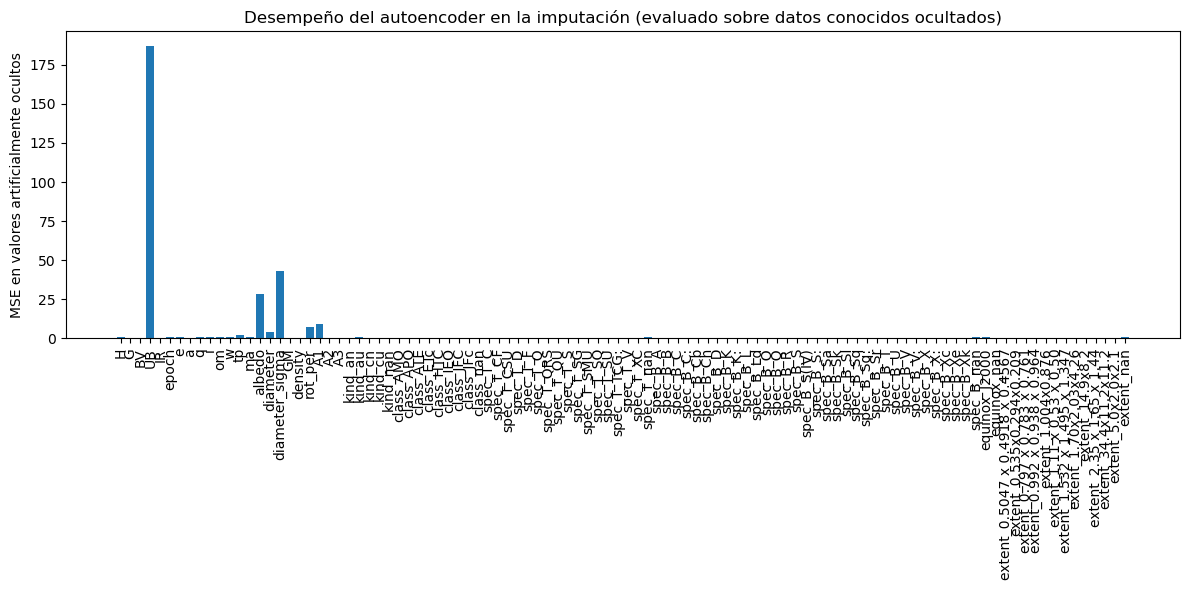

In [21]:
import matplotlib.pyplot as plt

# --- Evaluación con enmascarado artificial de valores conocidos ---

# Copiamos el test_data para crear una versión corrupta (donde se ocultarán algunos valores)
test_data_corrupted = test_data.clone()

# Definir la probabilidad de ocultar un valor (por ejemplo, 10%)
mask_probability = 0.1

# Generar una máscara aleatoria para determinar qué valores se ocultan
# Solo se ocultan aquellos valores que originalmente estaban presentes (test_mask == 1)
random_matrix = torch.rand_like(test_data_corrupted)
# artificial_missing_mask tendrá 0 en los lugares que ocultamos y 1 en los que dejamos intactos
artificial_missing_mask = torch.where((test_mask == 1) & (random_matrix < mask_probability), 
                                      torch.tensor(0.0), torch.tensor(1.0))

# Aplicar la máscara artificial: los valores donde artificial_missing_mask es 0 se "ocultan"
test_data_corrupted = test_data_corrupted * artificial_missing_mask

# Pasar los datos corruptos por el modelo para obtener la reconstrucción
model.eval()
with torch.no_grad():
    reconstructed_corrupted = model(test_data_corrupted)

# Calcular el error cuadrático para cada variable únicamente en las posiciones donde se ocultaron los datos
error_artificial = (reconstructed_corrupted - test_data)**2  # Comparar contra el valor original

# Convertir a NumPy para facilitar el procesamiento y graficado
error_np = error_artificial.numpy()
artificial_mask_np = artificial_missing_mask.numpy()

# Número total de variables (continuas + categóricas)
total_variables = test_data.shape[1]
variable_errors = []
for i in range(total_variables):
    # Seleccionar posiciones en las que se ocultaron los datos (artificial_missing_mask == 0)
    missing_positions = (artificial_mask_np[:, i] == 0)
    if np.sum(missing_positions) > 0:
        mse = np.mean(error_np[missing_positions, i])
    else:
        mse = np.nan  # Si no se ocultaron datos en esa variable
    variable_errors.append(mse)

# Crear nombres para cada variable: primero las continuas, luego las categóricas (resultado del one-hot)
cat_col_names = pd.get_dummies(df[categorical_cols], dummy_na=True).columns.tolist()
variable_names = continuous_cols + cat_col_names

# --- Graficar el error (MSE) por variable ---
plt.figure(figsize=(12, 6))
plt.bar(range(len(variable_errors)), variable_errors)
plt.xticks(range(len(variable_errors)), variable_names, rotation=90)
plt.ylabel("MSE en valores artificialmente ocultos")
plt.title("Desempeño del autoencoder en la imputación (evaluado sobre datos conocidos ocultados)")
plt.tight_layout()
plt.show()
